# Housing Prices Predictions

## 1. Data Exploration

In [114]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [115]:
np.random.seed(88)

In [116]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('figure', titlesize=16)
plt.rcParams['figure.figsize'] = [10, 6]

In [117]:
housing = pd.read_csv("data/chap2/housing.csv")

In [118]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [119]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [120]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [121]:
housing["ocean_proximity"].value_counts(normalize=True)

ocean_proximity
<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: proportion, dtype: float64

In [122]:
housing[housing["ocean_proximity"] == "ISLAND"]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9694,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
10229,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
15406,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND
17205,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
17593,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND


In [123]:
housing[housing["ocean_proximity"] == "ISLAND"]["median_income"].mean()

np.float64(2.7444200000000003)

In [124]:
housing[housing["ocean_proximity"] == "ISLAND"]["median_house_value"].mean()

np.float64(380440.0)

In [125]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

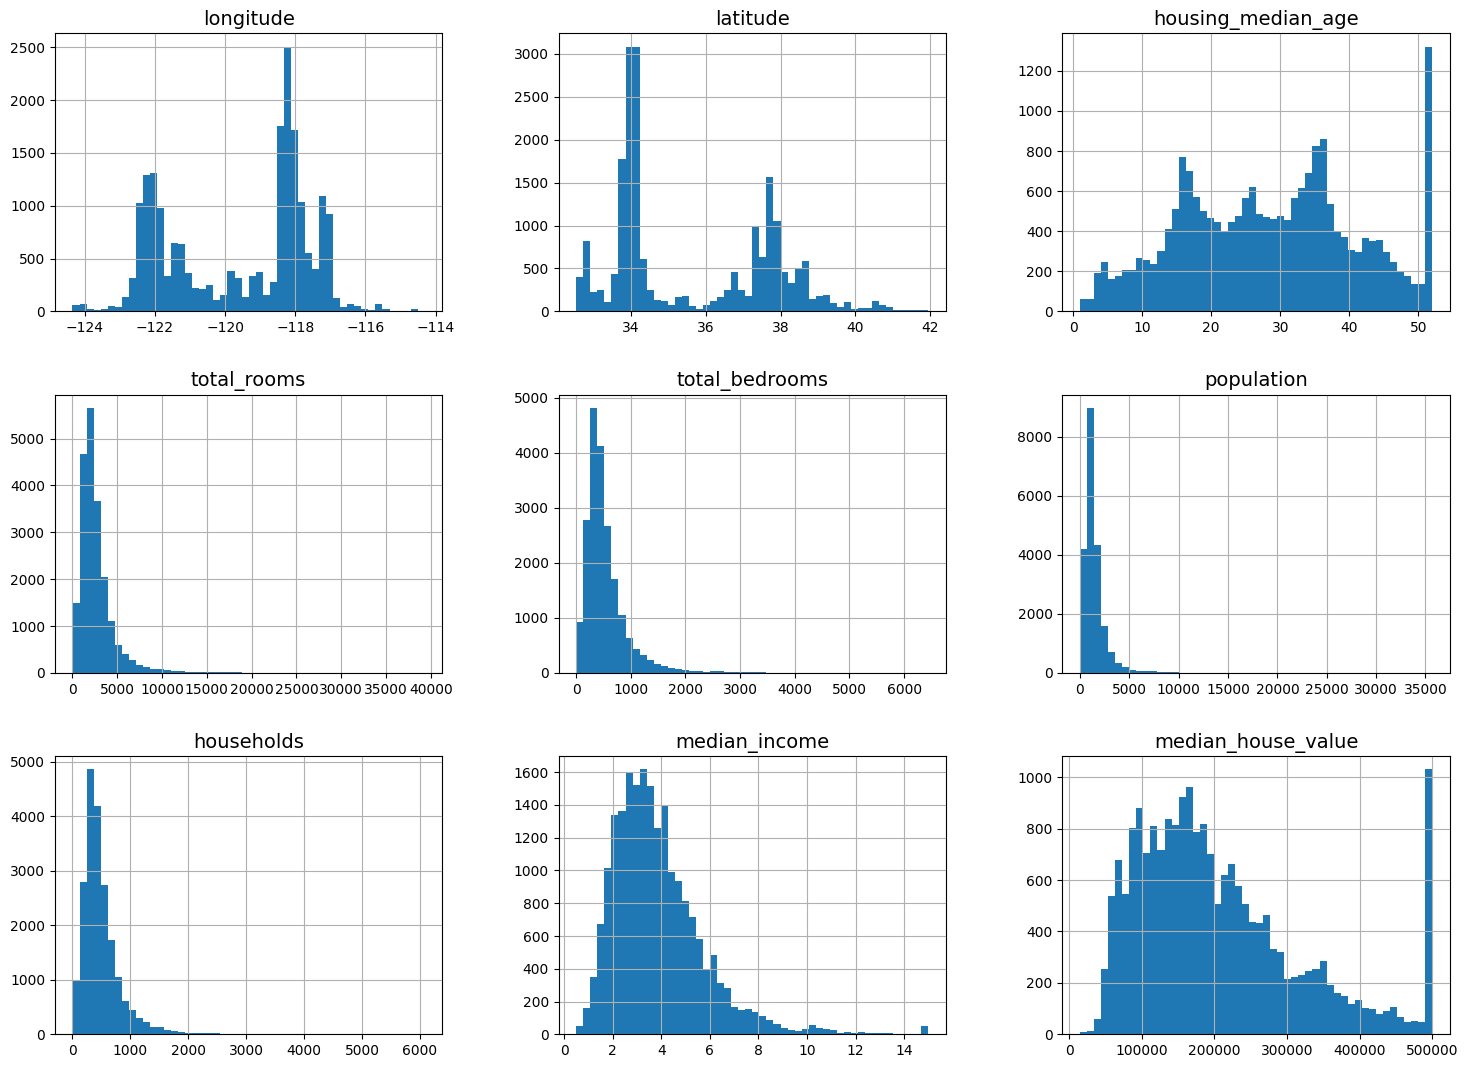

In [126]:
housing.hist(bins=50, figsize=(18, 13))
plt.show()

### 1.1 Prevent Data Snooping Bias

Random permutation of the indices, then compute test sample size using the ratio, get the corresponding indices from our shuffled array and then return the data corresponding to those indices.

In [127]:
type(housing.index.values)

numpy.ndarray

In [128]:
np.random.permutation(housing.index.values)

array([8310, 1801, 4781, ..., 2481, 4047, 6432], shape=(20640,))

In [129]:
np.random.permutation(len(housing))

array([ 5257,  1669,  5585, ...,  3688,  6964, 18964], shape=(20640,))

In [130]:
len(housing)*0.2

4128.0

In [131]:
np.random.permutation(len(housing))[0:12]

array([11600, 13384, 16861,  3677,  8682,   757, 16943,  5867,  7297,
        6887,  5529,  6073])

In [132]:
np.random.permutation(len(housing))[:12]

array([ 5358, 19391,   211, 11020,  6390, 10872, 16228,  1877,  9270,
       16790,  3970,  3079])

In [133]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(housing.index.values)
    test_set_size = int(len(housing)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [134]:
housing_train, housing_test = shuffle_and_split_data(housing, 0.2)

In [135]:
housing_train.shape, housing_test.shape

((16512, 10), (4128, 10))

In [136]:
housing_train, housing_test = sklearn.model_selection.train_test_split(housing, test_size=0.2, random_state=88)

In [137]:
housing_train.shape, housing_test.shape

((16512, 10), (4128, 10))

### 1.2 Stratified Sampling over Income

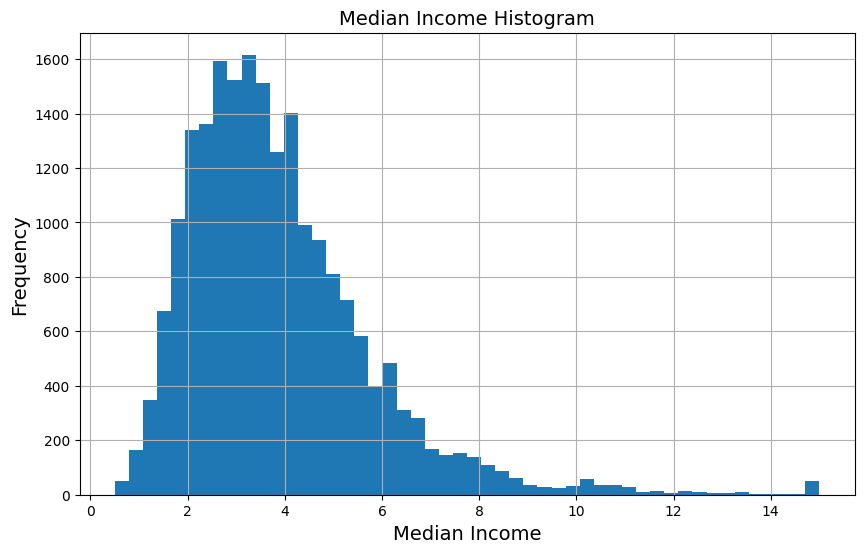

In [138]:
housing["median_income"].hist(bins=50)

plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.title("Median Income Histogram")
plt.show()

In [139]:
housing["income_class"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [140]:
housing["income_class"].value_counts(normalize=True).sort_index()

income_class
1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.114438
Name: proportion, dtype: float64

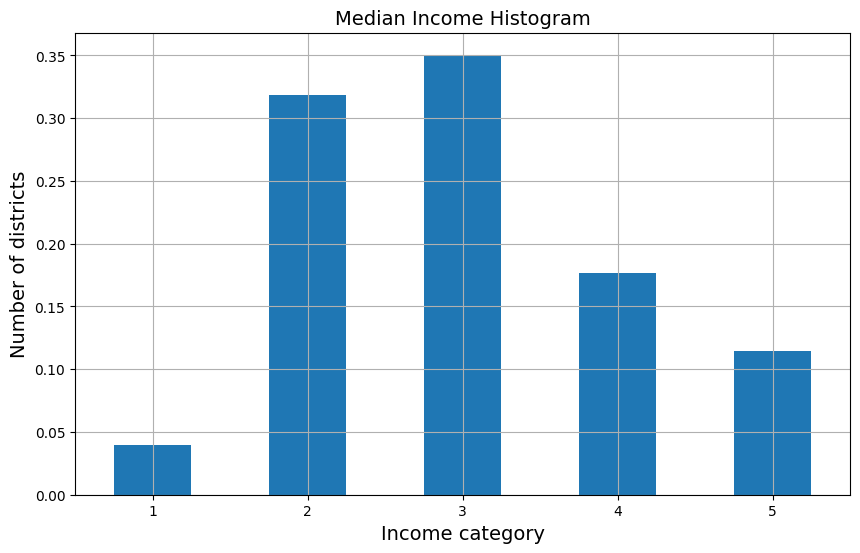

In [141]:
housing["income_class"].value_counts(normalize=True).sort_index().plot.bar(rot=0, grid=True)

plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.title("Median Income Histogram")
plt.show()

In [142]:
splitter = sklearn.model_selection.StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=88)

In [143]:
splitter.split(housing, housing["income_class"])

<generator object BaseShuffleSplit.split at 0x127cf9310>

In [144]:
for x in splitter.split(housing, housing["income_class"]):
    print(x)

(array([20180, 16716, 18333, ...,   577,  3430,  8546], shape=(16512,)), array([ 5812, 11546, 10224, ..., 11314, 18012, 16945], shape=(4128,)))
(array([11091,  2601, 17752, ...,  1243, 19834, 10441], shape=(16512,)), array([13061, 12876, 13057, ...,  3149, 18248,  5379], shape=(4128,)))


In [145]:
for x, y in splitter.split(housing, housing["income_class"]):
    print(x.shape, y.shape)

(16512,) (4128,)
(16512,) (4128,)


In [146]:
splitter = sklearn.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=88)

for train_indices, test_indices in splitter.split(housing, housing["income_class"]):
    strat_train_set = housing.iloc[train_indices]
    strat_test_set = housing.iloc[test_indices]

In [147]:
housing["income_class"].value_counts(normalize=True).sort_index(), strat_train_set["income_class"].value_counts(normalize=True).sort_index(), strat_test_set["income_class"].value_counts(normalize=True).sort_index()

(income_class
 1    0.039826
 2    0.318847
 3    0.350581
 4    0.176308
 5    0.114438
 Name: proportion, dtype: float64,
 income_class
 1    0.039789
 2    0.318859
 3    0.350594
 4    0.176296
 5    0.114462
 Name: proportion, dtype: float64,
 income_class
 1    0.039971
 2    0.318798
 3    0.350533
 4    0.176357
 5    0.114341
 Name: proportion, dtype: float64)

In [148]:
strat_train_set, strat_test_set = sklearn.model_selection.train_test_split(housing, test_size=0.2, random_state=88, stratify=housing["income_class"])

In [149]:
housing["income_class"].value_counts(normalize=True).sort_index(), strat_train_set["income_class"].value_counts(normalize=True).sort_index(), strat_test_set["income_class"].value_counts(normalize=True).sort_index()

(income_class
 1    0.039826
 2    0.318847
 3    0.350581
 4    0.176308
 5    0.114438
 Name: proportion, dtype: float64,
 income_class
 1    0.039789
 2    0.318859
 3    0.350594
 4    0.176296
 5    0.114462
 Name: proportion, dtype: float64,
 income_class
 1    0.039971
 2    0.318798
 3    0.350533
 4    0.176357
 5    0.114341
 Name: proportion, dtype: float64)

In [151]:
strat_train_set.drop("income_class", axis=1, inplace=True)
strat_test_set.drop("income_class", axis=1, inplace=True)

In [152]:
housing = strat_train_set.copy()

## 2. Actual Data Exploration

<Axes: xlabel='longitude', ylabel='latitude'>

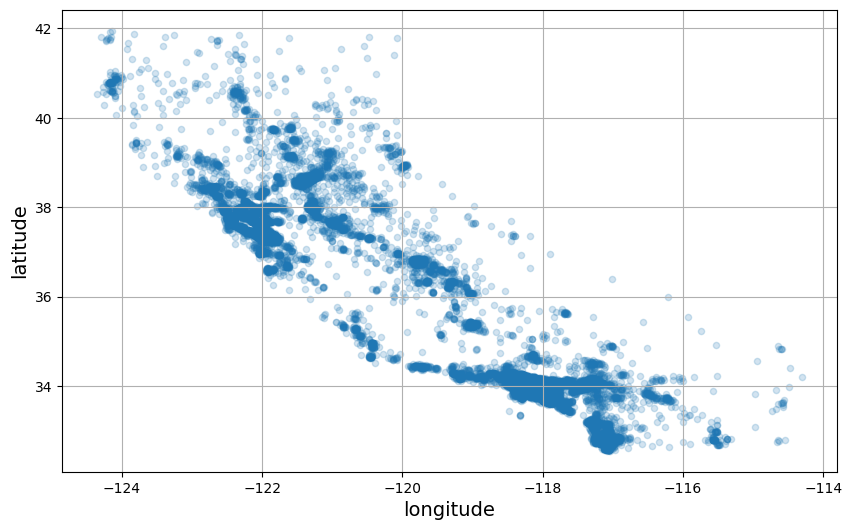

In [160]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

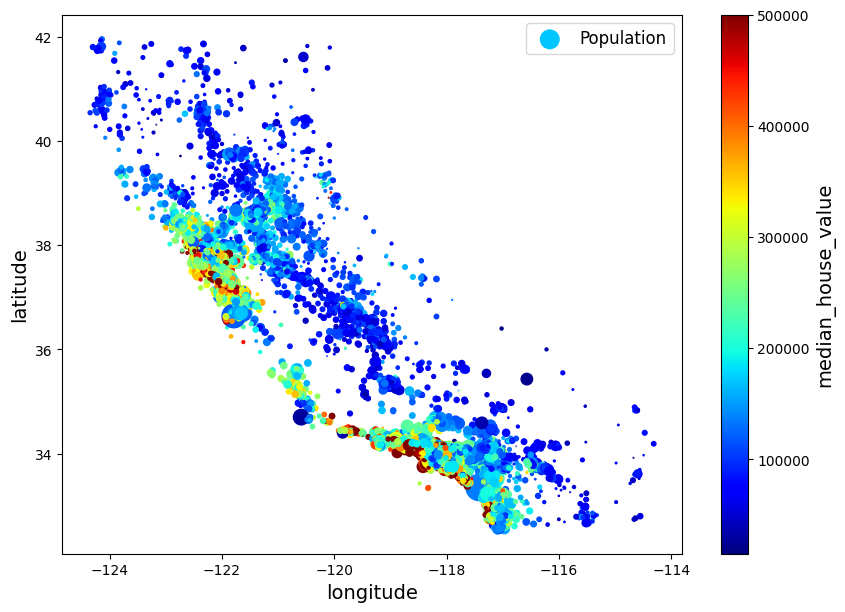

In [219]:
housing.plot(
             kind="scatter", x="longitude", y="latitude",
             s=housing["population"] / 100, label="Population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

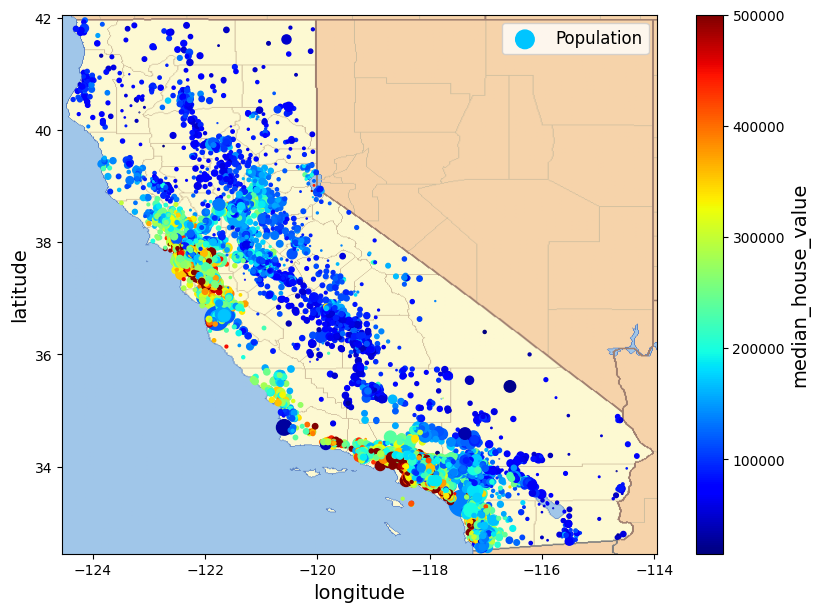

In [224]:
housing.plot(
             kind="scatter", x="longitude", y="latitude",
             s=housing["population"] / 100, label="Population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
california_img = plt.imread("data/chap2/california.png")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

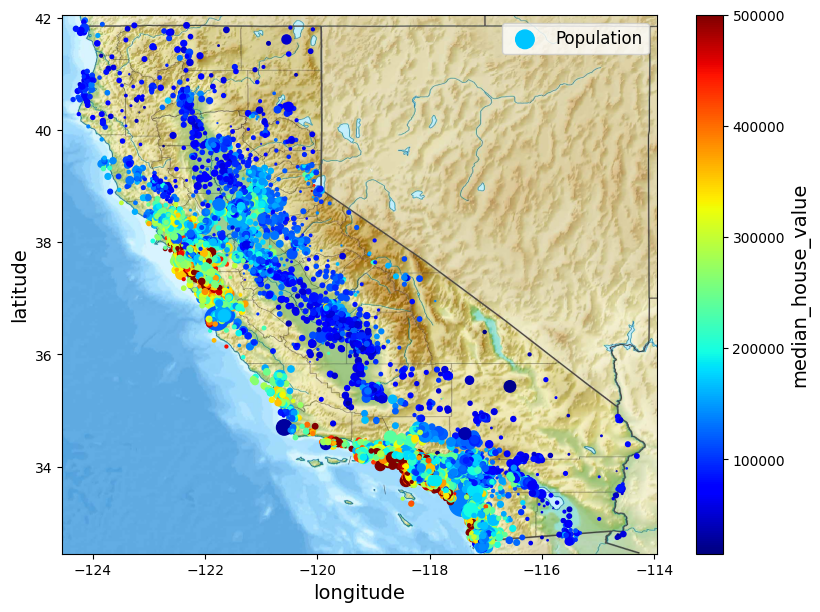

In [225]:
housing.plot(
             kind="scatter", x="longitude", y="latitude",
             s=housing["population"] / 100, label="Population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
california_img = plt.imread("data/chap2/california2.jpg")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

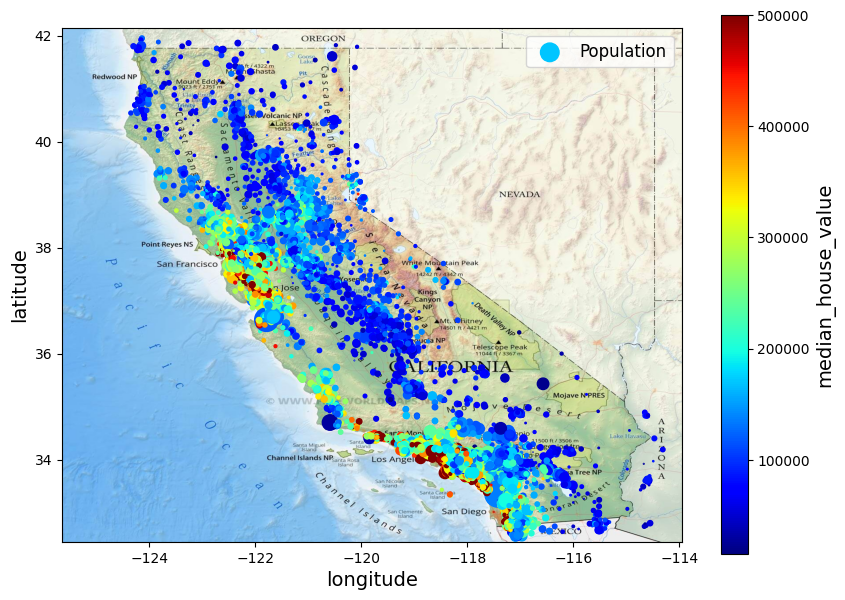

In [234]:
housing.plot(
             kind="scatter", x="longitude", y="latitude",
             s=housing["population"] / 100, label="Population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
california_img = plt.imread("data/chap2/california3.jpg")
axis = -125.65, -113.95, 32.45, 42.15
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

Interactive map: too resource-intensive

In [181]:
# import folium

# # Crear un mapa centrado en la media de las coordenadas del dataset
# m = folium.Map(location=[housing["latitude"].mean(), housing["longitude"].mean()], zoom_start=6)

# # Agregar todos los puntos del DataFrame
# for _, row in housing.iterrows():
#     folium.Marker(
#         location=[row["latitude"], row["longitude"]]
#     ).add_to(m)

# # Mostrar el mapa
# m

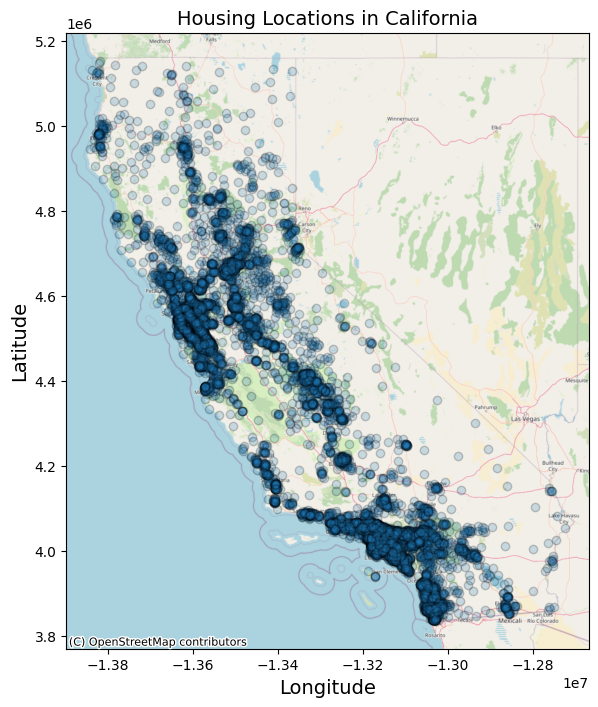

In [212]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Crear un GeoDataFrame con los datos de housing
gdf = gpd.GeoDataFrame(
    housing,  # Usa todo el DataFrame housing
    geometry=gpd.points_from_xy(housing["longitude"], housing["latitude"])
)

# Proyectar a Web Mercator (necesario para `contextily`)
gdf = gdf.set_crs("EPSG:4326").to_crs(epsg=3857)

# Graficar
fig, ax = plt.subplots(figsize=(12, 8))  # Adjusted figsize to make the plot bigger
gdf.plot(ax=ax, alpha=0.2, edgecolor="black")

# Agregar mapa base
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Añadir etiquetas y título
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Housing Locations in California")

# Mostrar el gráfico
plt.show()

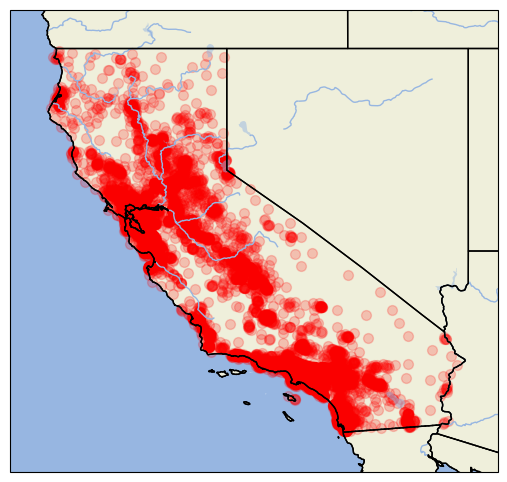

In [209]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Crear una figura con proyección geográfica
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Establecer los límites del mapa (puedes ajustarlo según tus datos)
ax.set_extent([
    housing["longitude"].min() - 1, housing["longitude"].max() + 1, 
    housing["latitude"].min() - 1, housing["latitude"].max() + 1
])

# Agregar mapa base y elementos geográficos
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES.with_scale('10m'))

# Graficar los puntos de housing
ax.scatter(
    housing["longitude"], housing["latitude"], 
    color='red', marker='o', s=50, transform=ccrs.PlateCarree(), alpha=0.2
)

# Mostrar el gráfico
plt.show()